In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import time
import scipy.io
import matplotlib.pyplot as plt

import torch.nn as nn
import torch

In [3]:
original_tensor = torch.tensor([[1,2],[3,4],[5,6]],device = 'cuda')


reshape_tensor = original_tensor.reshape(-1)

rereshape_tensor = reshape_tensor.reshape(original_tensor.shape)

print(original_tensor)
print(reshape_tensor)
print(rereshape_tensor)

tensor([[1, 2],
        [3, 4],
        [5, 6]], device='cuda:0')
tensor([1, 2, 3, 4, 5, 6], device='cuda:0')
tensor([[1, 2],
        [3, 4],
        [5, 6]], device='cuda:0')


In [28]:
weights = torch.tensor([[1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9]],device = 'cuda').float()
print(weights.t().shape)
print(weights.t())
spikes = torch.tensor([[0],[1]],device = 'cuda').float()
print(spikes.shape)
post_input = torch.matmul(weights.t(), spikes)

print(post_input.shape)


torch.Size([9, 2])
tensor([[1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.],
        [8., 8.],
        [9., 9.]], device='cuda:0')
torch.Size([2, 1])
torch.Size([9, 1])


In [31]:
input = torch.tensor([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[1,1,1,1,1,1,1],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])

print(input)

print(input.reshape(-1))

tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


[0, 1, 0, 1]


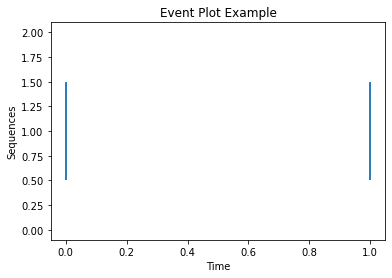

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random event data
data = [0,1,0,1]
print(data)
# Create the event plot
plt.eventplot(data)

# Customize the plot
plt.title('Event Plot Example')
plt.xlabel('Time')
plt.ylabel('Sequences')

# Display the plot
plt.show()

In [17]:
import torch

def calculate_output(pre_spike_times, weights, delays):
    # 1. Pick the spike_train from pre_spike_times with index of delays
    picked_spike_train = pre_spike_times.gather(0, delays)
    
    # 2. Calculate matmul with picked spike train and weights
    output = torch.matmul(weights, picked_spike_train.t())
    
    return output

# Sample tensors
weights = torch.rand(374, 247)
delays = torch.randint(0, 5, (374, 247))
pre_spike_times = torch.randint(0, 2, (5, 247))

# print(weights)
print(delays)

print(pre_spike_times)
print(pre_spike_times.gather(0, delays))
print(pre_spike_times.gather(0, delays).shape)

# print(pre_spike_times)
# Call the function
# output = calculate_output(pre_spike_times, weights, delays)
# print(output)

tensor([[3, 2, 3,  ..., 3, 1, 4],
        [0, 0, 4,  ..., 3, 4, 2],
        [4, 2, 0,  ..., 2, 0, 0],
        ...,
        [4, 4, 3,  ..., 1, 4, 4],
        [1, 1, 3,  ..., 4, 4, 2],
        [3, 2, 1,  ..., 0, 4, 3]])
tensor([[1, 0, 1,  ..., 1, 1, 1],
        [0, 1, 0,  ..., 1, 0, 0],
        [1, 1, 0,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 0, 1, 0],
        [1, 1, 0,  ..., 0, 0, 0]])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 0, 0],
        [0, 1, 1,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 1, 0, 0]])
torch.Size([374, 247])


In [26]:
import torch

A = torch.tensor([[1,1],[2,2],[3,3]])
B = torch.tensor([[1,1],[2,2],[3,3]])
print(A,B)
print(A*B)
print(torch.sum(A*B,axis=1))
print(torch.einsum('ij,ij->i', A, B))


tensor([[1, 1],
        [2, 2],
        [3, 3]]) tensor([[1, 1],
        [2, 2],
        [3, 3]])
tensor([[1, 1],
        [4, 4],
        [9, 9]])
tensor([ 2,  8, 18])
tensor([ 2,  8, 18])
